# **Install Intel Distribution of OpenVINO Toolkit**
Run the below cell to install OpenVino Directly to Colab (Takes 1 min)

In [ ]:
!wget https://apt.repos.intel.com/openvino/2020/GPG-PUB-KEY-INTEL-OPENVINO-2020
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2020
!touch /etc/apt/sources.list.d/intel-openvino-2020.list
!echo "deb https://apt.repos.intel.com/openvino/2020 all main" >> /etc/apt/sources.list.d/intel-openvino-2020.list

!apt update
!apt install intel-openvino-dev-ubuntu18-2020.4.287

!pip install test-generator==0.1.1
!source /opt/intel/openvino/bin/setupvars.sh

--2020-12-14 17:28:00--  https://apt.repos.intel.com/openvino/2020/GPG-PUB-KEY-INTEL-OPENVINO-2020
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.81.176.228, 2600:1409:12:3b7::4b23, 2600:1409:12:392::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.81.176.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2020’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2020-12-14 17:28:00 (124 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2020’ saved [939/939]

OK
Get:1 https://apt.repos.intel.com/openvino/2020 all InRelease [5,659 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.

# Download all Necessary files 

In [ ]:
!pip install gdown
!gdown --id 1j9x9PX8YIrWXlv9GVE68c8jUiM8MexKA
!unzip mangodetection.zip
!mv /content/content/mangodetection /content/

Downloading...
From: https://drive.google.com/uc?id=1j9x9PX8YIrWXlv9GVE68c8jUiM8MexKA
To: /content/mangodetection.zip
767MB [00:03, 216MB/s]
Archive:  mangodetection.zip
replace content/mangodetection/test/healthy/0001_0137.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/mangodetection/test/healthy/0001_0137.JPG  
  inflating: content/mangodetection/test/healthy/0001_0072.JPG  
  inflating: content/mangodetection/test/healthy/0001_0152.JPG  
  inflating: content/mangodetection/test/healthy/0001_0092.JPG  
  inflating: content/mangodetection/test/healthy/0001_0004.JPG  
  inflating: content/mangodetection/test/healthy/0001_0051.JPG  
  inflating: content/mangodetection/test/healthy/0001_0097.JPG  
  inflating: content/mangodetection/test/healthy/0001_0105.JPG  
  inflating: content/mangodetection/test/healthy/0001_0012.JPG  
  inflating: content/mangodetection/test/diseased/0012_0210.JPG  
  inflating: content/mangodetection/test/diseased/0012_0203.JPG  
  inflating: c

## Import Libraries

In [ ]:
import tensorflow as tf
import IPython.display as display
import PIL
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
data_dir = pathlib.Path('/content/mangodetection/train')
test_dir = pathlib.Path('/content/mangodetection/test')
train_count = len(list(data_dir.glob('*/*.JPG')))
test_count = len(list(test_dir.glob('*/*.JPG')))

batch_size = 32
img_height = 180
img_width = 180

#Generate More Data by Generator
image_gen_train = ImageDataGenerator(rescale = 1./255,validation_split=0.2,rotation_range = 45,width_shift_range=.15,height_shift_range =.15,horizontal_flip=True,zoom_range=0.5)

#Shuffle All Data 
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,subset = 'training',  directory= data_dir,shuffle=True,target_size=(img_height, img_width))  

#Divide Data for Validation
validation_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,subset = 'validation',  directory= data_dir,shuffle=True,target_size=(img_height, img_width)) 

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])

Found 330 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


# Create Model

In [ ]:
num_classes = 2
model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu',input_shape=(img_height, img_width ,3)),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

# Train Model

In [ ]:
rlr = ReduceLROnPlateau(patience=10, verbose=1)
es = EarlyStopping(patience=24, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint('/content/mangodetection/model.h5', save_best_only=True, verbose=1)

epochs = 15
history = model.fit(
  train_data_gen,
  callbacks=[rlr, es, mc],  
  validation_data=validation_data_gen,
  epochs=epochs
)

# Normal Inference of Trained Model

Takes Around 10-15 Seconds for 23 Images

In [ ]:
model_mango = load_model('/content/mangodetection/model.h5')

image_gen_test = ImageDataGenerator(rescale = 1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=32,directory= test_dir,shuffle=True,target_size=(img_height, img_width))  

start_time = time.time()
predictions = model_mango.predict(test_data_gen)
for i in range(len(predictions)):
    if(predictions[i][0]<0):
      print("Healthy     "+str(abs(predictions[i][0]))+"%")
    else:  
      print("Diseased    "+str(100-abs(predictions[i][0]))+"%")
print("Total Time: ", time.time()-start_time)
print("Average Time Per Image: ", (time.time()-start_time)/len(predictions))


Found 23 images belonging to 2 classes.
Diseased    90.07216739654541%
Healthy     6.96698%
Diseased    87.19365310668945%
Diseased    85.01132774353027%
Diseased    93.44462490081787%
Diseased    86.64076805114746%
Healthy     7.11954%
Healthy     6.9952016%
Healthy     7.206075%
Diseased    92.68936681747437%
Diseased    88.71868133544922%
Healthy     7.960397%
Diseased    89.65610313415527%
Diseased    91.33833312988281%
Healthy     6.717606%
Diseased    86.62044334411621%
Healthy     7.7327275%
Diseased    93.64321613311768%
Healthy     6.036774%
Diseased    87.49137020111084%
Healthy     6.4821835%
Diseased    88.45752334594727%
Diseased    87.38347721099854%
Total Time:  15.14534068107605
Average Time Per Image:  0.658498535985532


# Inference with OPENVINO

#### Step 1: Converting .h5 to .pb (frozen model)
##### This is required for OPENVINO to generate .xml and .bin from Frozen Model

In [ ]:
from tensorflow.python.framework import graph_io
from tensorflow.keras.models import load_model
import tensorflow.compat.v1 as tf
#Using Tensorflow 1.0 due to Compatibility issues
tf.disable_v2_behavior()

# Clear any previous session.
tf.keras.backend.clear_session()

#Directory for Saving Model
save_pb_dir = '/content/mangodetection'
model_fname = '/content/mangodetection/model.h5'

def freeze_graph(graph, session, output, save_pb_dir='/content/mangodetection', save_pb_name='frozen_model.pb', save_pb_as_text=False):
    with graph.as_default():
        graphdef_inf = tf.compat.v1.graph_util.remove_training_nodes(graph.as_graph_def())
        graphdef_frozen = tf.compat.v1.graph_util.convert_variables_to_constants(session, graphdef_inf, output)
        graph_io.write_graph(graphdef_frozen, save_pb_dir, save_pb_name, as_text=save_pb_as_text)
        return graphdef_frozen


tf.keras.backend.set_learning_phase(0) 

model = load_model(model_fname)
session=tf.keras.backend.get_session()
INPUT_NODE = [t.op.name for t in model.inputs]
OUTPUT_NODE = [t.op.name for t in model.outputs]
print(INPUT_NODE, OUTPUT_NODE)
frozen_graph = freeze_graph(session.graph, session, [out.op.name for out in model.outputs], save_pb_dir=save_pb_dir)

#### Step:2 Converting .pb to .xml and .bin
This is required for OPENVINO's Inference Engine <br>
It is done using OpenVino's Model Optimizer mo_tf.py which converts .pb to .xml and .bin

In [ ]:

mo_tf_path = '/opt/intel/openvino/deployment_tools/model_optimizer/mo_tf.py'

pb_file = '/content/mangodetection/frozen_model.pb'
output_dir = '/content/mangodetection'
img_height = 180
input_shape = [1, img_height, img_height, 3]
input_shape_str = str(input_shape).replace(' ', '')

#Running Commands to run OPENVINO's Model Optimiser Converter 'mo_tf.py'
!source /opt/intel/openvino/bin/setupvars.sh
!python {mo_tf_path} --input_model {pb_file} --output_dir {output_dir} --input_shape {input_shape_str} --data_type FP16

#### Step 3: Running Inference

This is done by using OpenVino's Library ,whch creates Plugin for the Environment and Network with CPU

**The Code is Stored in inference.py because OPENVINO can't compile it directly on Colab**

In [ ]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python /content/mangodetection/inference.py

[setupvars.sh] OpenVINO environment initialized
2020-12-14 17:40:42.935788: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/content/mangodetection/inference.py:37: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin("CPU", plugin_dirs=plugin_dir)
/content/mangodetection/inference.py:39: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
/content/mangodetection/inference.py:40: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  assert len(net.inputs.keys()) == 1
Healthy     6.158958%
Healthy     5.799221%
Diseased    85.87350463867188%
Diseased    87.54100227355957%
Diseased    90.0072135925293%
Di

In [ ]:
#inference.py
'''
from PIL import Image
import numpy as np
import sys
import pathlib
import glob
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
try:
    from openvino import inference_engine as ie
    from openvino.inference_engine import IENetwork, IEPlugin
except Exception as e:
    exception_type = type(e).__name__
    print("The following error happened while importing Python API module:\n[ {} ] {}".format(exception_type, e))
    sys.exit(1)

def pre_process_image(imagePath, img_height=180):
    # Model input format
    n, c, h, w = [1, 3, img_height, img_height]
    image = Image.open(imagePath)
    processedImg = image.resize((h, w), resample=Image.BILINEAR)

    # Normalize to keep data between 0 - 1
    processedImg = (np.array(processedImg) - 0) / 255.0

    # Change data layout from HWC to CHW
    processedImg = processedImg.transpose((2, 0, 1))
    processedImg = processedImg.reshape((n, c, h, w))

    return processedImg

# Plugin initialization for specified device and load extensions library if specified.
plugin_dir = None
model_xml = '/content/mangodetection/frozen_model.xml'
model_bin = '/content/mangodetection/frozen_model.bin'
# Devices: GPU (intel), CPU, MYRIAD
plugin = IEPlugin("CPU", plugin_dirs=plugin_dir)
# Read IR
net = IENetwork(model=model_xml, weights=model_bin)
assert len(net.inputs.keys()) == 1
assert len(net.outputs) == 1
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))
# Load network to the plugin
exec_net = plugin.load(network=net)
del net

#Prepare Test Data
test_data_gen=[]
file_list=glob.glob("/content/mangodetection/test/diseased/*.JPG")
for i in file_list:
  processedImg = pre_process_image(i)
  test_data_gen.append(processedImg)
file_list=glob.glob("/content/mangodetection/test/healthy/*.JPG")
for i in file_list:
  processedImg = pre_process_image(i)
  test_data_gen.append(processedImg)

# Shuffle Data
random.shuffle(test_data_gen)


# Run inference
start_time = time.time()
for i in range(len(test_data_gen)):
    predictions = exec_net.infer(inputs={input_blob: test_data_gen[i]})
  
    if(predictions['dense_1/BiasAdd/Add'][0][0]<0):
      print("Healthy     "+str(abs(predictions['dense_1/BiasAdd/Add'][0][0]))+"%")
    else:  
      print("Diseased    "+str(100-abs(predictions['dense_1/BiasAdd/Add'][0][0]))+"%")
    
    #print(predictions['dense_1/BiasAdd/Add'][0])
    
print("Total Time: ", time.time()-start_time)
print("Average Time Per Image: ", (time.time()-start_time)/len(test_data_gen))
'''


## Running Frontend using Anvil

Run Above cells and run this cell and open my [website](https://diseaseidentification.anvil.app/) and you can upload images.

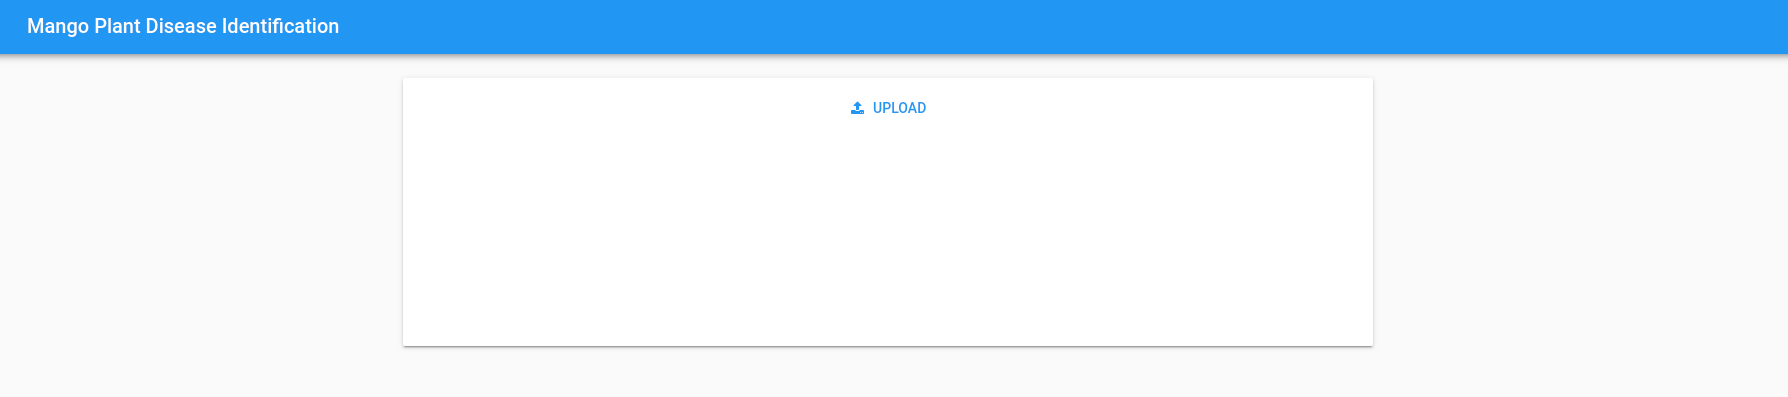

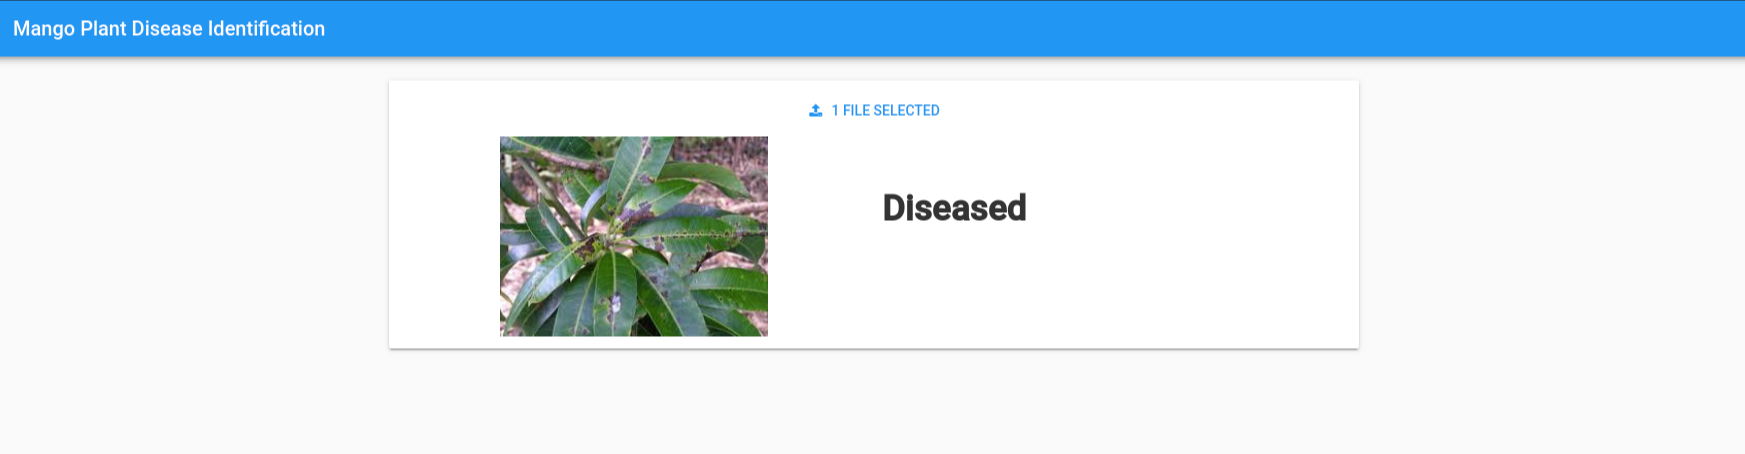

In [ ]:
!pip install anvil-uplink
import anvil.server
anvil.server.connect("SNO5N6UNOGXMICYSINU4DIEJ-AFBDS2UOAU7ZPMEU")
import anvil.media
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

import cv2
%cd /content
!mkdir tst
%cd tst
!mkdir test
%cd /content
@anvil.server.callable
def imgload(file):
  model_mango = load_model('/content/mangodetection/model.h5')
  with anvil.media.TempFile(file) as filename:
    img = load_img(filename)
    img_array = img_to_array(img)
    save_img('/content/tst/test/temp.png',img_array)
    #predictions = model_mango.predict(img)
    print("h")
    
  image_gen_test = ImageDataGenerator(rescale = 1./255)
  test_data_gen = image_gen_test.flow_from_directory(batch_size=1,directory= "/content/tst",shuffle=True,target_size=(img_height, img_width)) 
  predictions = model_mango.predict(test_data_gen) 
  print(test_data_gen,predictions)
  li=''
  if(predictions[0][0]>abs(predictions[0][1])):
      li='Healthy'
  else:  
    li="Diseased"
  return(li)
anvil.server.wait_forever()    

/content
mkdir: cannot create directory ‘tst’: File exists
/content/tst
mkdir: cannot create directory ‘test’: File exists
/content
h
Found 1 images belonging to 1 classes.
<tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x7f1d58cd75c0> [[ 14.136735 -12.907527]]


KeyboardInterrupt: ignored